<a href="https://colab.research.google.com/github/lbeltran-adi/SemitronSeminar/blob/main/DigitalFiltering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First of all, let's import the data

In [ ]:
import pandas as pd

url='https://raw.githubusercontent.com/lbeltran-adi/SemitronSeminar/main/oscilloscope_data.csv'

df = pd.read_csv(url)
print(df.head(10))


   Sample   Time(S)    CH1(V)
0       0 -0.004000 -0.000078
1       1 -0.003999 -0.000078
2       2 -0.003998 -0.000078
3       3 -0.003997 -0.000078
4       4 -0.003996 -0.000078
5       5 -0.003995 -0.000078
6       6 -0.003994 -0.000078
7       7 -0.003993 -0.000078
8       8 -0.003992 -0.000078
9       9 -0.003991 -0.000078


# If no data available, we can create our own dataset:
1. add a normally distributed noise to a sinewave
2. filter the signal with the Scipy library

In [ ]:
import numpy as np
import scipy.signal as signal

# Parameters
original_sampling_rate = 1000  # Original sampling rate
desired_sampling_rate = 4000  # Desired oversampling rate
cutoff_frequency = 100  # Cutoff frequency of the low-pass filter

# Create an example noisy signal
t = np.linspace(0, 1, original_sampling_rate)
signal_noisy = np.sin(2 * np.pi * 10 * t) + np.random.normal(0, 0.5, len(t))

# Upsample the signal
resampled_signal = signal.resample(signal_noisy, len(signal_noisy) * (desired_sampling_rate // original_sampling_rate))

# Apply low-pass filtering
b, a = signal.butter(4, cutoff_frequency / (desired_sampling_rate / 2), 'low')
filtered_signal = signal.lfilter(b, a, resampled_signal)
# Adjust time array for filtered signal
filtered_time = np.linspace(0, 1, desired_sampling_rate)


# Let's visualize the signals

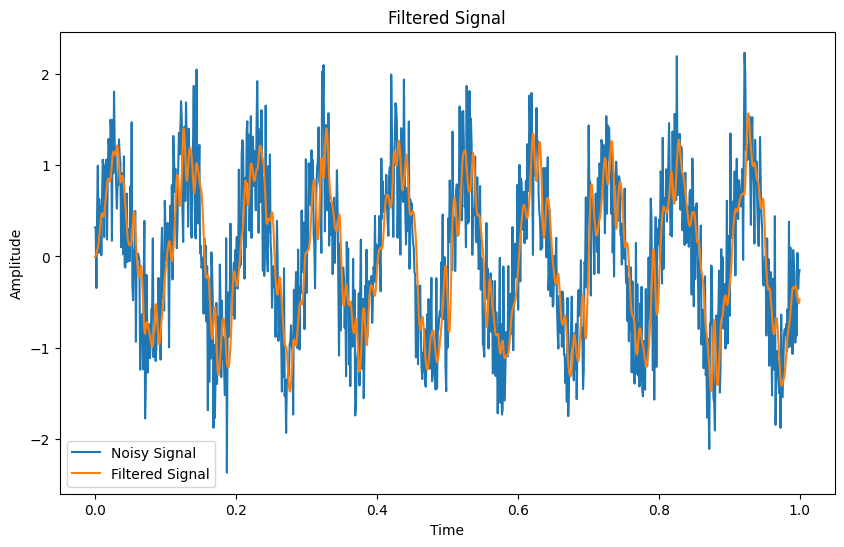

In [ ]:
import matplotlib.pyplot as plt

# Plot the noisy signal
plt.figure(figsize=(10, 6))
plt.plot(t, signal_noisy, label='Noisy Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Noisy Signal')
plt.legend()

# Plot the filtered signal

plt.plot(filtered_time, filtered_signal, label='Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Filtered Signal')
plt.legend()
plt.show()


# Let's use the data taken from ADALM2000 Oscilloscope
This the signal gathered on the oscilloscope:

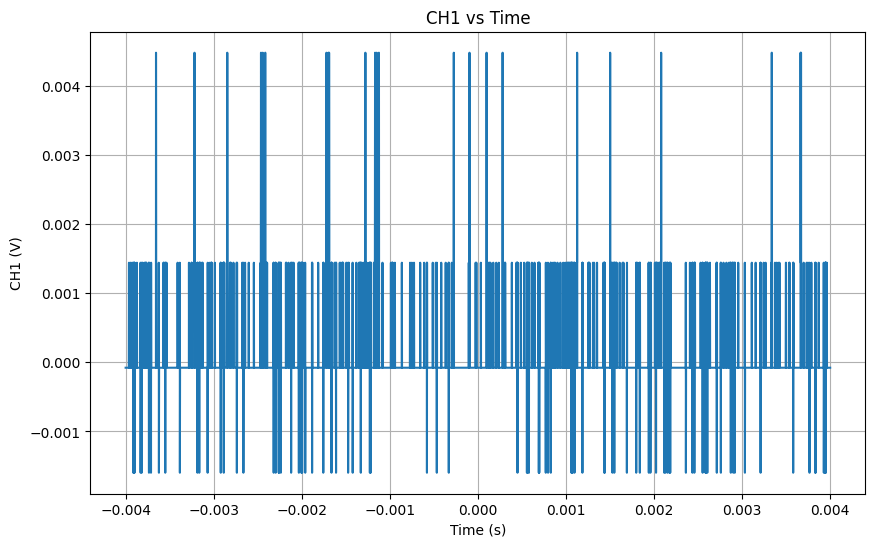

RMS value: 476.6075661659291 μ Vrms


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Extract the data from the DataFrame
time = df['Time(S)']
ch1 = df['CH1(V)']

# Plot 'CH1(V)' against 'Time(s)'
plt.figure(figsize=(10, 6))
plt.plot(time, ch1)
plt.xlabel('Time (s)')
plt.ylabel('CH1 (V)')
plt.title('CH1 vs Time')
plt.grid(True)
plt.show()

# Calculate the RMS value
rms = np.sqrt(np.mean(np.square(ch1)))*1e6

print(f"RMS value: {rms} \u03BC Vrms")

# Let's apply a FIR (Finite Impulse Response) filter

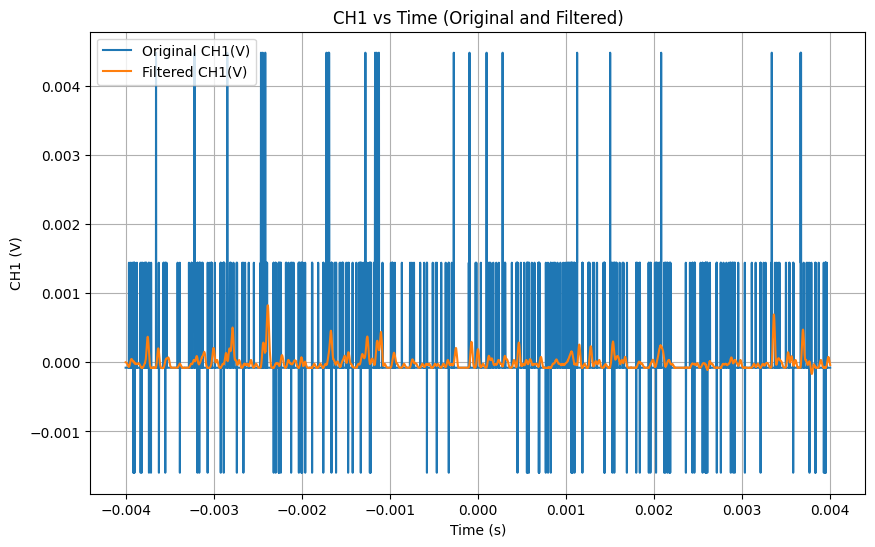

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

# Assuming you have a DataFrame named 'df' with columns 'Time(s)' and 'CH1(V)' like the importeed on the first Cell

# Extract the data from the DataFrame
time = df['Time(S)']
ch1 = df['CH1(V)']

# Design the FIR filter
order = 51  # Filter order
cutoff_freq = 1000  # Cutoff frequency in Hz
nyquist_freq = 0.5 / (time[1] - time[0])  # Nyquist frequency
normalized_cutoff = cutoff_freq / nyquist_freq
fir_coeffs = signal.firwin(order, normalized_cutoff)

# Apply the FIR filter to the data
filtered_ch1 = signal.lfilter(fir_coeffs, 1.0, ch1)

# Plot 'CH1(V)' against 'Time(s)' (Original and Filtered)
plt.figure(figsize=(10, 6))
plt.plot(time, ch1, label='Original CH1(V)')
plt.plot(time, filtered_ch1, label='Filtered CH1(V)')
plt.xlabel('Time (s)')
plt.ylabel('CH1 (V)')
plt.title('CH1 vs Time (Original and Filtered)')
plt.legend()
plt.grid(True)
plt.show()


# Let's apply an IIR (Infinite Impulse Response) filter

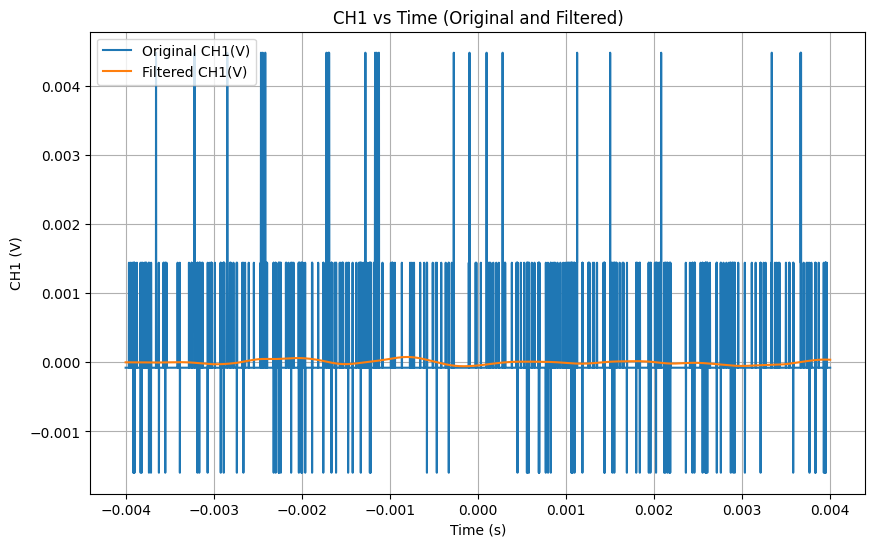

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

# Assuming you have a DataFrame named 'df' with columns 'Time(s)' and 'CH1(V)'

# Extract the data from the DataFrame
time = df['Time(S)']
ch1 = df['CH1(V)']

# Design the IIR filter
order = 4  # Filter order
cutoff_freq = 1000  # Cutoff frequency in Hz
b, a = signal.butter(order, cutoff_freq, fs=1/(time[1] - time[0]))

# Apply the IIR filter to the data
filtered_ch1 = signal.lfilter(b, a, ch1)

# Plot 'CH1(V)' against 'Time(s)' (Original and Filtered)
plt.figure(figsize=(10, 6))
plt.plot(time, ch1, label='Original CH1(V)')
plt.plot(time, filtered_ch1, label='Filtered CH1(V)')
plt.xlabel('Time (s)')
plt.ylabel('CH1 (V)')
plt.title('CH1 vs Time (Original and Filtered)')
plt.legend()
plt.grid(True)
plt.show()


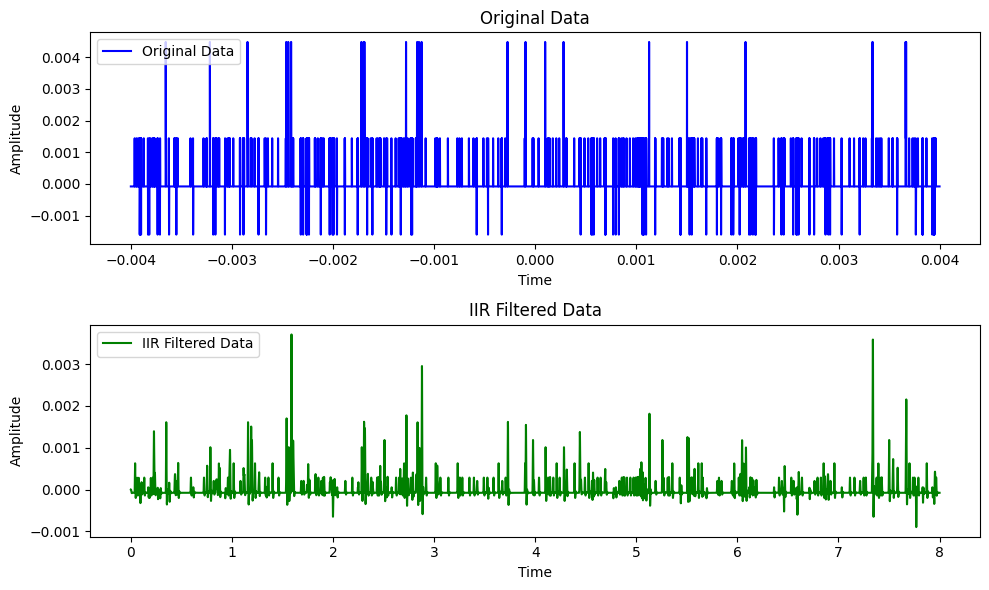

RMS value: 253.38634192255773 μ Vrms


In [ ]:
import numpy as np
import scipy.signal as signal

# Parameters
original_sampling_rate = 1000  # Original sampling rate
desired_sampling_rate = 4000  # Desired oversampling rate
cutoff_frequency = 100  # Cutoff frequency of the filters
order = 4  # IIR filter order

# Apply oversampling
resampled_signal = signal.resample(ch1, len(ch1) * (desired_sampling_rate // original_sampling_rate))

# Apply IIR filtering
b, a = signal.butter(order, cutoff_frequency / (desired_sampling_rate / 2), 'low')
iir_filtered_signal = signal.lfilter(b, a, resampled_signal)

# Plot the data before and after filtering
plt.figure(figsize=(10, 6))

# Plot original data
plt.subplot(2, 1, 1)
plt.plot(time, ch1, 'b', label='Original Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Original Data')
plt.legend()

# Plot oversampled data after IIR filtering
plt.subplot(2, 1, 2)
plt.plot(np.arange(len(iir_filtered_signal)) / desired_sampling_rate, iir_filtered_signal, 'g', label='IIR Filtered Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('IIR Filtered Data')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate the RMS value
rms = np.sqrt(np.mean(np.square(iir_filtered_signal)))*1e6

print(f"RMS value: {rms} \u03BC Vrms")

# Let's apply a SINC filter

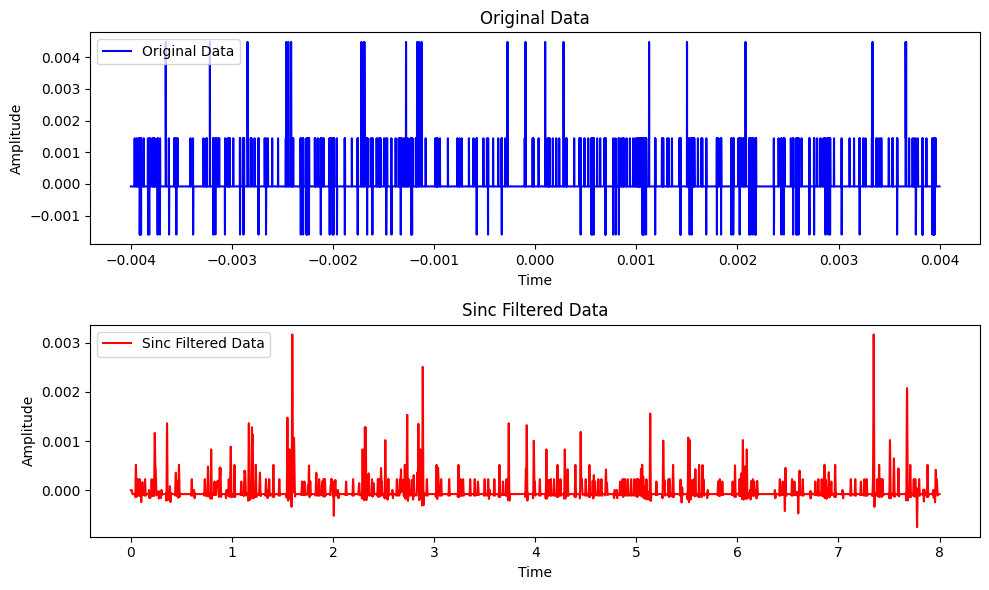

RMS value: 234.2751926157171 μ Vrms


In [ ]:
import numpy as np
import scipy.signal as signal

# Parameters
original_sampling_rate = 1000  # Original sampling rate
desired_sampling_rate = 4000  # Desired oversampling rate
cutoff_frequency = 100  # Cutoff frequency of the filters
filter_length = 101  # Sinc filter length

# Apply oversampling
resampled_signal = signal.resample(ch1, len(ch1) * (desired_sampling_rate // original_sampling_rate))

# Apply Sinc filtering
taps = signal.firwin(filter_length, cutoff_frequency, window='hamming', fs=desired_sampling_rate)
sinc_filtered_signal = signal.lfilter(taps, 1, resampled_signal)

# Plot the data before and after filtering
plt.figure(figsize=(10, 6))

# Plot original data
plt.subplot(2, 1, 1)
plt.plot(time, ch1, 'b', label='Original Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Original Data')
plt.legend()

# Plot oversampled data after Sinc filtering
plt.subplot(2, 1, 2)
plt.plot(np.arange(len(sinc_filtered_signal)) / desired_sampling_rate, sinc_filtered_signal, 'r', label='Sinc Filtered Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sinc Filtered Data')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate the RMS value
rms = np.sqrt(np.mean(np.square(sinc_filtered_signal)))*1e6

print(f"RMS value: {rms} \u03BC Vrms")